In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

names = ["Amplitude", "el_1", "el_2", "el_3", "el_4"]
random_lists = [[round(random.uniform(1.0, 100.0),2) for _ in range(24)] for _ in range(len(names))]
result = dict(zip(names, random_lists))
print(result)

{'Amplitude': [29.91, 46.18, 4.21, 14.91, 22.21, 61.04, 13.51, 63.84, 60.58, 57.15, 64.23, 42.41, 29.5, 21.73, 44.72, 77.99, 5.2, 25.21, 58.95, 88.95, 4.68, 32.36, 40.69, 64.96], 'el_1': [11.35, 59.73, 53.35, 47.84, 57.62, 41.02, 14.62, 98.56, 6.79, 65.18, 26.2, 62.99, 94.07, 65.61, 78.11, 90.22, 42.4, 37.13, 62.58, 18.75, 64.22, 13.39, 38.73, 3.33], 'el_2': [47.91, 98.01, 11.95, 51.52, 96.47, 19.83, 84.95, 7.31, 66.34, 92.84, 7.98, 56.01, 98.27, 70.73, 55.15, 19.43, 64.33, 39.25, 63.43, 92.45, 51.02, 46.37, 93.69, 97.68], 'el_3': [56.94, 13.14, 25.86, 99.86, 47.76, 47.65, 84.61, 90.69, 55.8, 90.42, 28.73, 68.41, 17.06, 48.34, 11.89, 28.94, 37.47, 20.01, 64.53, 56.58, 18.2, 32.25, 68.6, 6.11], 'el_4': [96.75, 6.88, 68.13, 25.58, 37.04, 59.4, 35.47, 55.79, 65.4, 11.76, 16.21, 1.42, 89.52, 31.89, 29.8, 75.1, 3.32, 78.25, 22.14, 40.81, 10.4, 53.12, 32.18, 42.32]}


In [25]:
impulses = pd.read_csv('d:/Work/2024/data2024/raw/raw_Na2SO4__28.02.24-12.43.19.dat', delimiter=',', header=None)
impulses.columns = ['Impulse', 'Step', 'Channel'] + [str(i) for i in range(1, 601)]
impulses[['Impulse', 'Step', 'Channel']] = impulses[['Impulse', 'Step', 'Channel']].astype('category')
impulses['Threshold'] = impulses.iloc[:,len(impulses.columns)-100:len(impulses.columns)].mean(axis=1) * (-1)
impulses.loc[:,[str(i) for i in range(1, 601)]] = impulses.loc[:,[str(i) for i in range(1, 601)]].add(impulses['Threshold'],axis=0)
start = 7
end = 7 + 60
print (end)
impulses['Sum'] = impulses.iloc[:,start:end].sum(axis=1)
unique_steps = impulses['Step'].unique()
print(impulses.loc[(impulses['Channel'] == 'Analyt') & (impulses['Step'] == 1230)].loc[:, ['Threshold', 'Sum', impulses.columns[start], impulses.columns[end]]])


67
     Threshold       Sum         5        65
501  -0.008855  6.048047  0.010353 -0.014788
503   0.018584  7.479403  0.024899  0.003949
505   0.010519  7.360727  0.021992  0.003942
507   0.019847  7.542321  0.002955  0.016493
509   0.019744  5.696339 -0.029702 -0.036148
..         ...       ...       ...       ...
991   0.013385  7.050783  0.003907  0.015188
993   0.017414  7.104927  0.008903 -0.005279
995   0.008379  5.686798  0.008248  0.006636
997   0.018468  7.177840  0.008345  0.016081
999   0.014948  8.734580 -0.010646  0.022230

[250 rows x 4 columns]


              5        60
0     -0.000135  0.009535
1      0.033628  0.032016
2     -0.000435  0.009234
3     -0.014072  0.007201
4     -0.000168  0.009502
...         ...       ...
33995 -0.015197 -0.002627
33996  0.000280  0.007371
33997  0.013453  0.033115
33998 -0.000390  0.006378
33999  0.001093 -0.004064

[34000 rows x 2 columns]


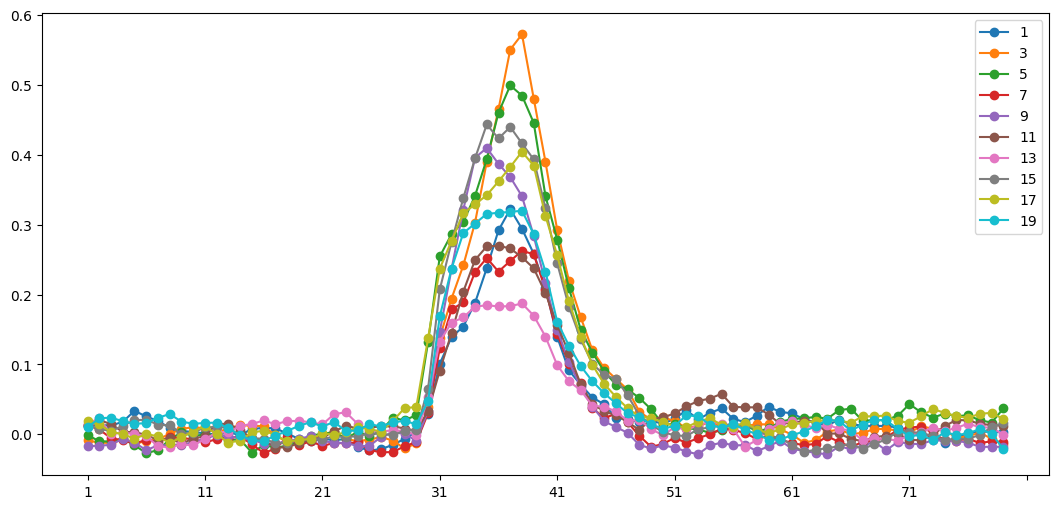

In [72]:
plot_impulses = impulses.loc[impulses['Channel'] == 'Analyt'].iloc[:10][[str(i) for i in range (1, 80)]].T
# Строим график с кружками на узлах для выбранных колонок
plot_impulses.plot(kind='line', marker='o', figsize=(13, 6))
plt.show()

In [55]:
final_output = {}
for step_value in unique_steps:
    df_step = impulses[impulses['Step'] == step_value]
    output_dict = {
        "step": step_value,
        "pulses": []
    }
    for impulse_value in df_step['Impulse'].unique():
        df_impulse = df_step[df_step['Impulse'] == impulse_value]
        if impulse_value % 1 == 0:
            pulses_dict={"pulse": impulse_value,
                        "pulses": { #Объект с импульсами не нужен, не буедм его считывать. Это ускорит дело.
                            "impulse_reper": df_impulse[df_impulse['Channel']=='Reper'].iloc[:,3:603].values.flatten().tolist(),
                            "impulse_analyt": df_impulse[df_impulse['Channel']=='Analyt'].iloc[:,3:603].values.flatten().tolist(),
                        },
                        "threshold_analyt": list(df_impulse[df_impulse['Channel'] == 'Analyt']['Threshold'])[0],
                        "amplitude_reper": round(list(df_impulse[df_impulse['Channel'] == 'Reper']['Sum'])[0],8),
                        "amplitude_analyt": round(list(df_impulse[df_impulse['Channel'] == 'Analyt']['Sum'])[0],8)
                        }
            output_dict['pulses'].append(pulses_dict)
    final_output[str(f"step_{step_value}")] = output_dict #Вот из этого объекта легко получим все данные.

In [ ]:
keys = list(final_output.keys())
for i in final_output[keys[0]]["pulses"]:
    print(i["amplitude_analyt"], i["pulses"])
#    print(i["threshold_analyt"], i["amplitude_analyt"])


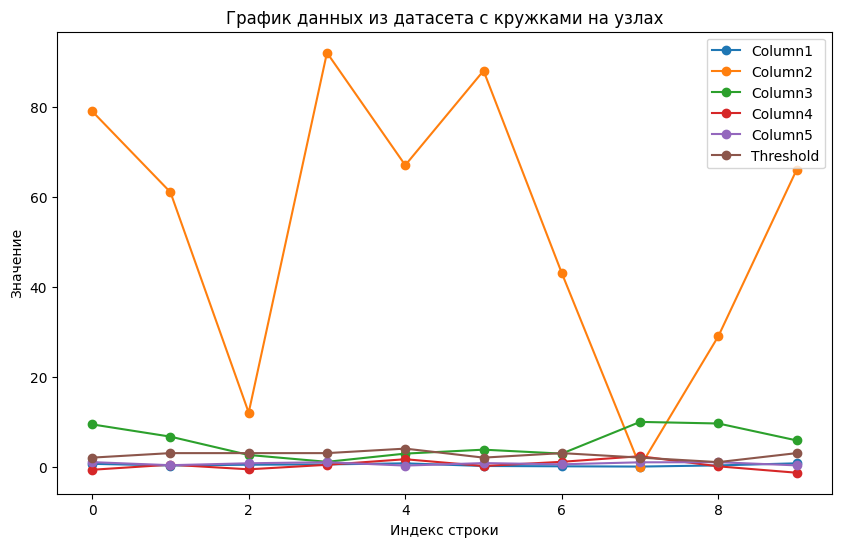

In [42]:
# Создаем данные для датасета
data = {
    'Column1': np.random.rand(10),
    'Column2': np.random.randint(0, 100, 10),
    'Column3': np.random.uniform(1, 10, 10),
    'Column4': np.random.randn(10),
    'Column5': np.random.uniform(0, 1, 10),
    'Threshold': np.random.randint(1, 5, 10)
}

# Создаем DataFrame из данных
df = pd.DataFrame(data)

# Строим график с кружками на узлах
df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('График данных из датасета с кружками на узлах')
plt.xlabel('Индекс строки')
plt.ylabel('Значение')
plt.show()